In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal, fftpack

In [2]:
# create random noise
sig_in =np.round(2**13*np.random.randn(131072))

# define signal rate
Fs = 1.28125e9
F_width = 500e6;

In [3]:
# create a filter to shape the noise
coeffs = signal.firwin(350,F_width/Fs)

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


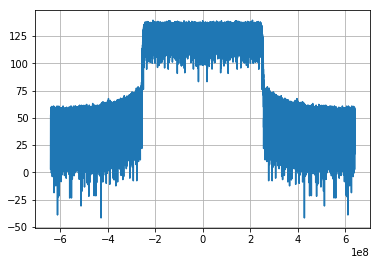

In [4]:
# filter
sig_out = signal.convolve(sig_in, coeffs)

# create axis
freq_axis = np.linspace(-Fs/2, Fs/2, sig_out.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(sig_out))))
plt.grid(True)
channel_500MHz = sig_out[sig_out.size - 131072:sig_out.size]

In [5]:
# now let's create the double channel wave
# now we want to create a tone that repeats every 131072 samples..so multiples 

N_samples = 131072;
fundamental_freq = Fs/(N_samples-1)
t = np.arange(131072)
freq_desired = 250e6
freq_desired2 = -250e6
freq_desired = np.floor(freq_desired / fundamental_freq) * fundamental_freq
freq_desired2 = np.floor(freq_desired2 / fundamental_freq) * fundamental_freq


In [6]:
sig_upconvert1 = (2**15-1)*(np.cos(2*np.pi*freq_desired/Fs*t) + 1j*np.sin(2*np.pi*freq_desired/Fs*t))
sig_upconvert2 = (2**15-1)*(np.cos(2*np.pi*freq_desired2/Fs*t) + 1j*np.sin(2*np.pi*freq_desired2/Fs*t))

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


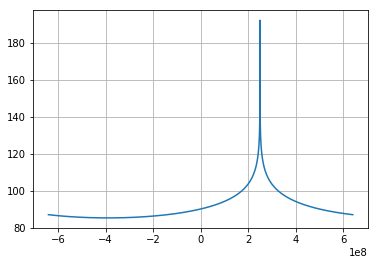

In [7]:
# create axis
freq_axis = np.linspace(-Fs/2, Fs/2, sig_upconvert1.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(sig_upconvert1))))
plt.grid(True)

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1077312322.710066+71761081.06174633j)


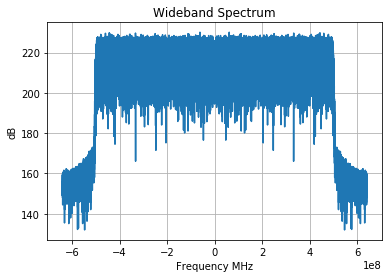

In [8]:
# multiply signal to offset
spectral_test = channel_500MHz * sig_upconvert1+ channel_500MHz *sig_upconvert2

freq_axis = np.linspace(-Fs/2, Fs/2, spectral_test.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(spectral_test))))
plt.title('Wideband Spectrum')
plt.grid(True)
plt.xlabel('Frequency MHz')
plt.ylabel('dB')
print(np.max(spectral_test))

In [9]:
# now the other signal we care about is much easier

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


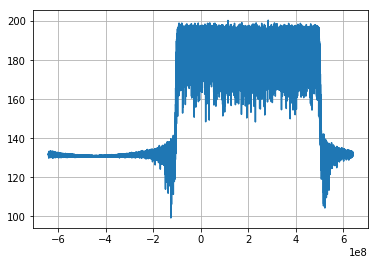

In [39]:
# create random noise
sig_in = np.round(2**8*np.random.randn(131072))

# define signal rate
Fs = 1.28125e9
F_width = 600e6;
# create a filter to shape the noise
coeffs = signal.firwin(350,F_width/Fs)
# filter
sig_out = signal.convolve(sig_in, coeffs)

channel_600MHz = sig_out[sig_out.size-131072:sig_out.size]

# offset in frequency
N_samples = 131072;
fundamental_freq = Fs/(N_samples-1)
t = np.arange(131072)
freq_desired = 200e6
freq_desired = np.floor(freq_desired / fundamental_freq) * fundamental_freq
sig_upconvert1 = (2**15-1)*(np.cos(2*np.pi*freq_desired/Fs*t) + 1j*np.sin(2*np.pi*freq_desired/Fs*t))
channel_600MHz = channel_600MHz * sig_upconvert1

# create axis
freq_axis = np.linspace(-Fs/2, Fs/2, channel_600MHz.size)
plt.plot(freq_axis, 20*np.log10(fftpack.fftshift(fftpack.fft(channel_600MHz))))
plt.grid(True)





In [46]:
# output it to a file now
ratio = 2096 / np.max(channel_600MHz.real)
channel_600MHz_scaled = channel_600MHz * ratio
ratio = 4096 / np.max(spectral_test.real)
spectral_test_scaled = spectral_test * ratio


In [47]:
print("max: " + str(np.max(spectral_test_scaled)))
file_out = open('spectral_test_scaled.txt', 'w')
for x, item in enumerate(spectral_test_scaled):
    num_real = int(item.real)
    num_imag = int(item.imag)
    if (num_real < 0):
        num_real = num_real + 2**16;
    if (num_imag < 0):
        num_imag = num_imag + 2**16;
    file_out.write(format(num_real, '04x') + format(num_imag, '04x') + '\n')


max: (4096+272.83953022044693j)


In [48]:
print("max: " + str(np.max(channel_600MHz_scaled)))
file_out = open('channel_600MHz_scaled.txt', 'w')
for x, item in enumerate(channel_600MHz_scaled):
    num_real = int(item.real)
    num_imag = int(item.imag)
    if (num_real < 0):
        num_real = num_real + 2**16;
    if (num_imag < 0):
        num_imag = num_imag + 2**16;
    file_out.write(format(num_real, '04x') + format(num_imag, '04x') + '\n')


max: (2096+358.7272230816888j)


C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


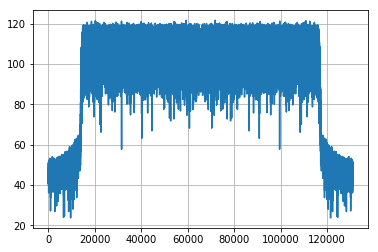

In [49]:
plt.plot(20*np.log10(fftpack.fftshift(fftpack.fft(spectral_test_scaled))))
plt.grid(True)

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


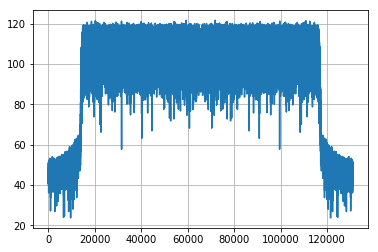

In [50]:
plt.plot(20*np.log10(fftpack.fftshift(fftpack.fft(spectral_test_scaled))))
plt.grid(True)

C:\Users\zstechly\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


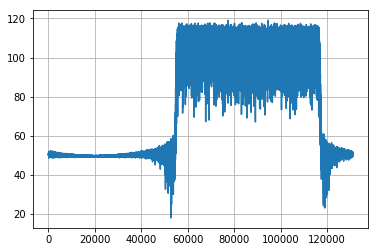

In [51]:
plt.plot(20*np.log10(fftpack.fftshift(fftpack.fft(channel_600MHz_scaled))))
plt.grid(True)